<a href="https://colab.research.google.com/github/Siddhi124github/data-science-prac-1-and-2/blob/main/Sheth_L_U_J_%26_Sir_M_v_college_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SIDDHI NAIK T096
PRACTICAL 9

In [1]:
from google.colab import files
uploaded = files.upload()

Reducing Features Using Principal Components

In [10]:
# -------------------------------
# Load libraries
# -------------------------------
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# -------------------------------
# Load the dataset
# -------------------------------
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="Target")

# -------------------------------
# Standardize the feature matrix
# -------------------------------
X_scaled = StandardScaler().fit_transform(X)

# -------------------------------
# Create a PCA that will retain 99% of the variance
# -------------------------------
pca = PCA(n_components=0.99, whiten=True)

# Conduct PCA
X_pca = pca.fit_transform(X_scaled)

# -------------------------------
# Show results
# -------------------------------
print("Original number of features:", X_scaled.shape[1])
print("Reduced number of features:", X_pca.shape[1])


Original number of features: 30
Reduced number of features: 17


Original number of features: 30
Reduced number of features (PCs): 17

Feature loadings (top contributors for each PC):

PC1:
mean concave points     0.260854
mean concavity          0.258400
worst concave points    0.250886
mean compactness        0.239285
worst perimeter         0.236640
Name: PC1, dtype: float64

PC2:
mean fractal dimension     0.366575
fractal dimension error    0.280092
worst fractal dimension    0.275339
compactness error          0.232716
smoothness error           0.204430
Name: PC2, dtype: float64

PC3:
texture error       0.374634
smoothness error    0.308839
symmetry error      0.288584
radius error        0.268481
perimeter error     0.266645
Name: PC3, dtype: float64

PC4:
worst texture              0.632808
mean texture               0.603050
texture error              0.359856
worst compactness          0.091328
worst fractal dimension    0.077053
Name: PC4, dtype: float64

PC5:
mean smoothness     0.365089
worst smoothness    0.324435
mean symmetry      

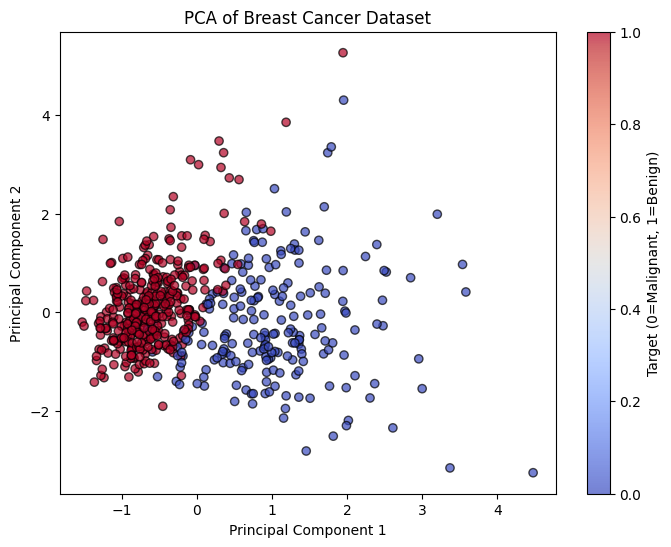

In [11]:
# -------------------------------
# Load libraries
# -------------------------------
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------
# Load the dataset
# -------------------------------
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="Target")

# -------------------------------
# Standardize the feature matrix
# -------------------------------
X_scaled = StandardScaler().fit_transform(X)

# -------------------------------
# PCA retaining 99% variance
# -------------------------------
pca = PCA(n_components=0.99, whiten=True)
X_pca = pca.fit_transform(X_scaled)

print("Original number of features:", X_scaled.shape[1])
print("Reduced number of features (PCs):", X_pca.shape[1])

# -------------------------------
# Feature loadings (which features contribute most to PCs)
# -------------------------------
loadings = pd.DataFrame(pca.components_.T,
                        columns=[f'PC{i+1}' for i in range(X_pca.shape[1])],
                        index=X.columns)

print("\nFeature loadings (top contributors for each PC):")
for i in loadings.columns:
    print(f"\n{i}:")
    print(loadings[i].sort_values(ascending=False).head(5))  # top 5 features per PC

# -------------------------------
# Plot the first two principal components
# -------------------------------
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="coolwarm", edgecolor='k', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Breast Cancer Dataset")
plt.colorbar(scatter, label="Target (0=Malignant, 1=Benign)")
plt.show()


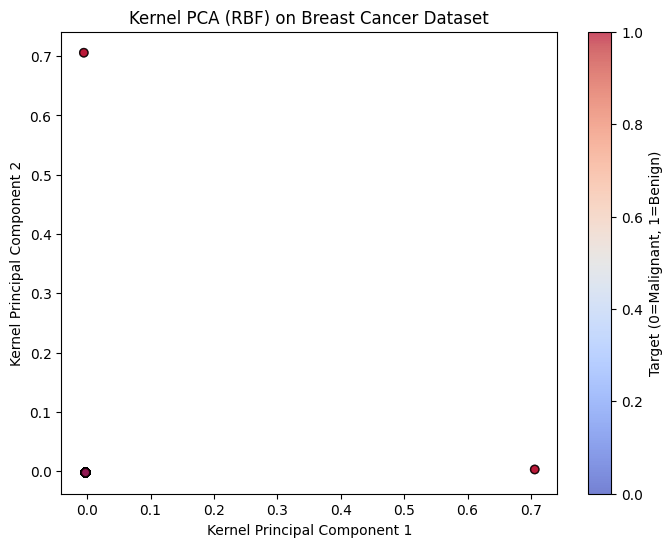

In [12]:
# -------------------------------
# Load libraries
# -------------------------------
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt

# -------------------------------
# Load the dataset
# -------------------------------
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="Target")  # 0=Malignant, 1=Benign

# -------------------------------
# Standardize features
# -------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------------
# Apply Kernel PCA with RBF kernel
# -------------------------------
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15, fit_inverse_transform=True)
X_kpca = kpca.fit_transform(X_scaled)

# -------------------------------
# Create DataFrame for plotting
# -------------------------------
kpca_df = pd.DataFrame(X_kpca, columns=["KPC1", "KPC2"])
kpca_result = pd.concat([kpca_df, y], axis=1)

# -------------------------------
# Plot Kernel PCA results
# -------------------------------
plt.figure(figsize=(8,6))
scatter = plt.scatter(kpca_df["KPC1"], kpca_df["KPC2"], c=y, cmap="coolwarm", edgecolor='k', alpha=0.7)
plt.xlabel("Kernel Principal Component 1")
plt.ylabel("Kernel Principal Component 2")
plt.title("Kernel PCA (RBF) on Breast Cancer Dataset")
plt.colorbar(scatter, label="Target (0=Malignant, 1=Benign)")
plt.show()


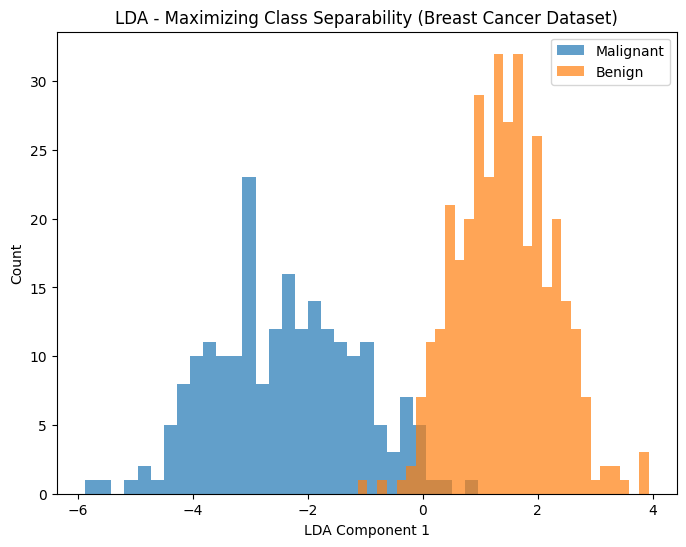

In [13]:
# -------------------------------
# Load libraries
# -------------------------------
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt

# -------------------------------
# Load dataset
# -------------------------------
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="Target")  # 0=Malignant, 1=Benign

# -------------------------------
# Standardize features
# -------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------------
# Apply LDA
# -------------------------------
lda = LDA(n_components=1)  # max components = number of classes - 1
X_lda = lda.fit_transform(X_scaled, y)

# -------------------------------
# Create DataFrame for plotting
# -------------------------------
lda_df = pd.DataFrame(X_lda, columns=["LDA1"])
lda_result = pd.concat([lda_df, y], axis=1)

# -------------------------------
# Plot LDA results
# -------------------------------
plt.figure(figsize=(8,6))
plt.hist(X_lda[y==0], bins=30, alpha=0.7, label='Malignant')
plt.hist(X_lda[y==1], bins=30, alpha=0.7, label='Benign')
plt.xlabel("LDA Component 1")
plt.ylabel("Count")
plt.title("LDA - Maximizing Class Separability (Breast Cancer Dataset)")
plt.legend()
plt.show()


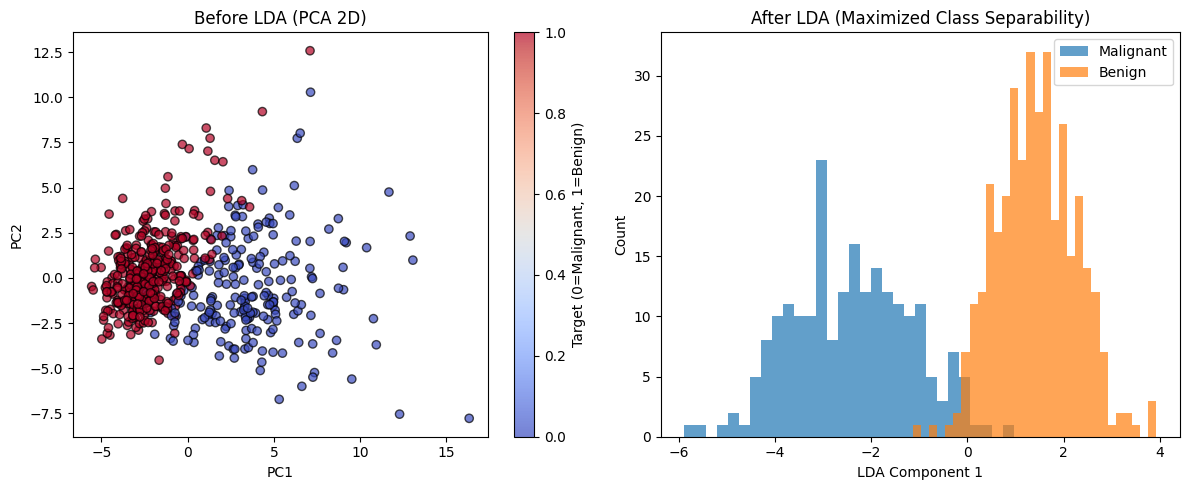

In [14]:
# -------------------------------
# Load libraries
# -------------------------------
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt

# -------------------------------
# Load dataset
# -------------------------------
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="Target")  # 0=Malignant, 1=Benign

# -------------------------------
# Standardize features
# -------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------------
# 1️⃣ Before LDA: Reduce to 2D using PCA for visualization
# -------------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Before LDA (PCA 2D)")
plt.colorbar(label="Target (0=Malignant, 1=Benign)")

# -------------------------------
# 2️⃣ After LDA: Reduce to 1D (since 2 classes)
# -------------------------------
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

plt.subplot(1,2,2)
plt.hist(X_lda[y==0], bins=30, alpha=0.7, label='Malignant')
plt.hist(X_lda[y==1], bins=30, alpha=0.7, label='Benign')
plt.xlabel("LDA Component 1")
plt.ylabel("Count")
plt.title("After LDA (Maximized Class Separability)")
plt.legend()

plt.tight_layout()
plt.show()
